## NEXRAD Level 2 Plotting Example

*Author: Ryan Purciel*

An example on how to plot NEXRAD Level 2 data

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy.feature import NaturalEarthFeature
from matplotlib.colors import from_levels_and_colors

def define_hi_res_fig(lon_bounds: tuple[float, float],
                      lat_bounds: tuple[float, float],
                      projection: cartopy.crs = ccrs.PlateCarree(),
                      draw_earth_features: bool = True,
                      draw_gridlines: bool = False) -> tuple[mpl.figure.Figure, mpl.axes.Axes]:

    fig = plt.figure(figsize=(22,16))
    ax = plt.axes(projection = ccrs.PlateCarree())
    ax.set_extent([min(lon_bounds), max(lon_bounds), min(lat_bounds), max(lat_bounds)], 
                  crs=ccrs.PlateCarree())

    if draw_earth_features:
        states = NaturalEarthFeature(category="cultural", scale="50m",
                                              facecolor="none",
                                              name="admin_1_states_provinces")
        ax.add_feature(states, linewidth=1.0, edgecolor="black")
        ax.coastlines('50m', linewidth=1.5)
        ax.add_feature(cartopy.feature.LAKES.with_scale('10m'), linestyle='-', linewidth=0.5, alpha=1,edgecolor='blue',facecolor='none')
        ax.add_feature(cfeature.BORDERS, linewidth=1.5)

    if draw_gridlines:
        ax.set_xlabel('Latitude')
        ax.set_ylabel('Longitude')

        gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                          linewidth=1, 
                          color='black', 
                          alpha=0.5, 
                          linestyle='--', 
                          draw_labels=True)

        gl.xlabels_top = False
        gl.ylabels_left = True
        gl.ylabels_right= False
        gl.xlines = True
        gl.ylines = True

        gl.xlocator = mticker.FixedLocator(np.arange(min(lon_bounds), 
                                                     max(lon_bounds), 
                                                     2))
        gl.ylocator = mticker.FixedLocator(np.arange(min(lat_bounds), 
                                                     max(lat_bounds), 
                                                     1))

    return fig, ax

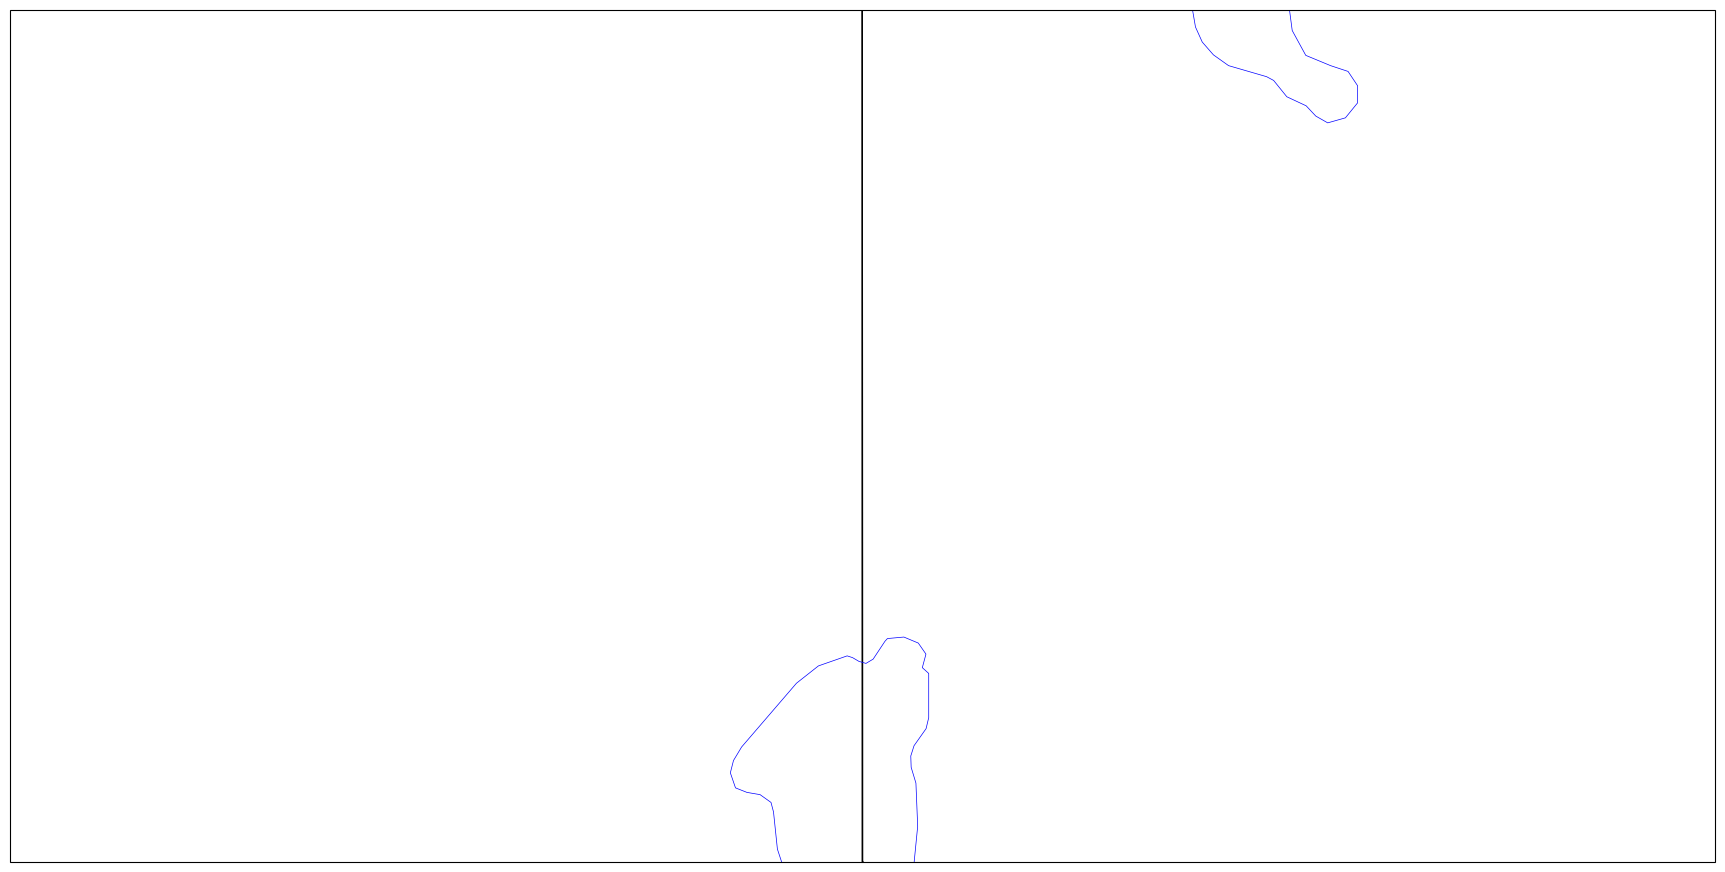

In [2]:
fig, ax = define_hi_res_fig([-119, -121],[40, 39])

In [3]:
import numpy as np

NEXRAD_SWEEP = 8

DBZ_LEVELS = np.arange(5., 75., 5.)

DBZ_COLORS = np.array([[4,233,231],
                      [1,159,244], 
                      [3,0,244],
                      [2,253,2], 
                      [1,197,1],
                      [0,142,0], 
                      [253,248,2],
                      [229,188,0], 
                      [253,149,0],
                      [253,0,0], 
                      [212,0,0],
                      [188,0,0],
                      [248,0,253],
                      [152,84,198]], 
                      np.float32) / 255.0

DBZ_CMAP, DBZ_NORM = from_levels_and_colors(DBZ_LEVELS, 
                                            DBZ_COLORS,
                                            extend="max")

In [4]:
import pyart

data = pyart.io.read_nexrad_archive("raw_radar_data/KRGX20240107_000309_V06")
radar_display = pyart.graph.RadarMapDisplay(data)


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



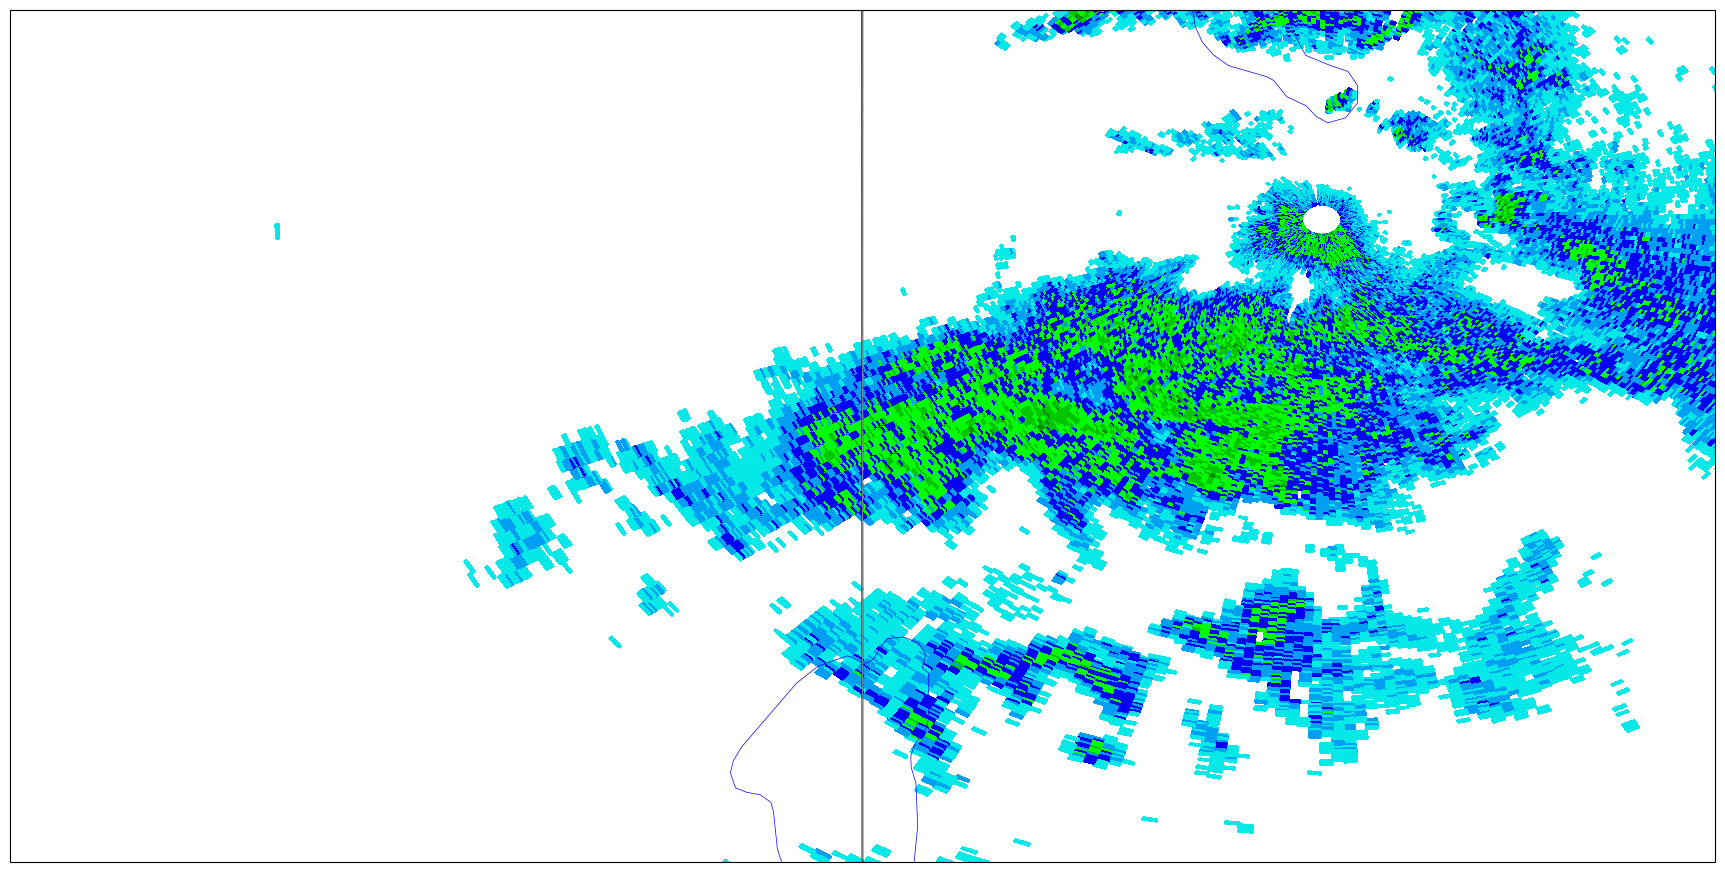

<Figure size 640x480 with 0 Axes>

In [5]:
radar_display.plot_ppi_map('reflectivity', 
                     NEXRAD_SWEEP, 
                     colorbar_flag=False, 
                     title_flag=False,
                     projection=ccrs.PlateCarree(), 
                     ticks = DBZ_LEVELS, 
                     cmap = DBZ_CMAP, 
                     norm = DBZ_NORM,
                     # lat_lines=np.arange(extent[2], extent[3], .50), 
                     # lon_lines=np.arange(extent[0], extent[1], .50),
                     vmin=-12, 
                     vmax=64, 
                     ax=ax)
fig

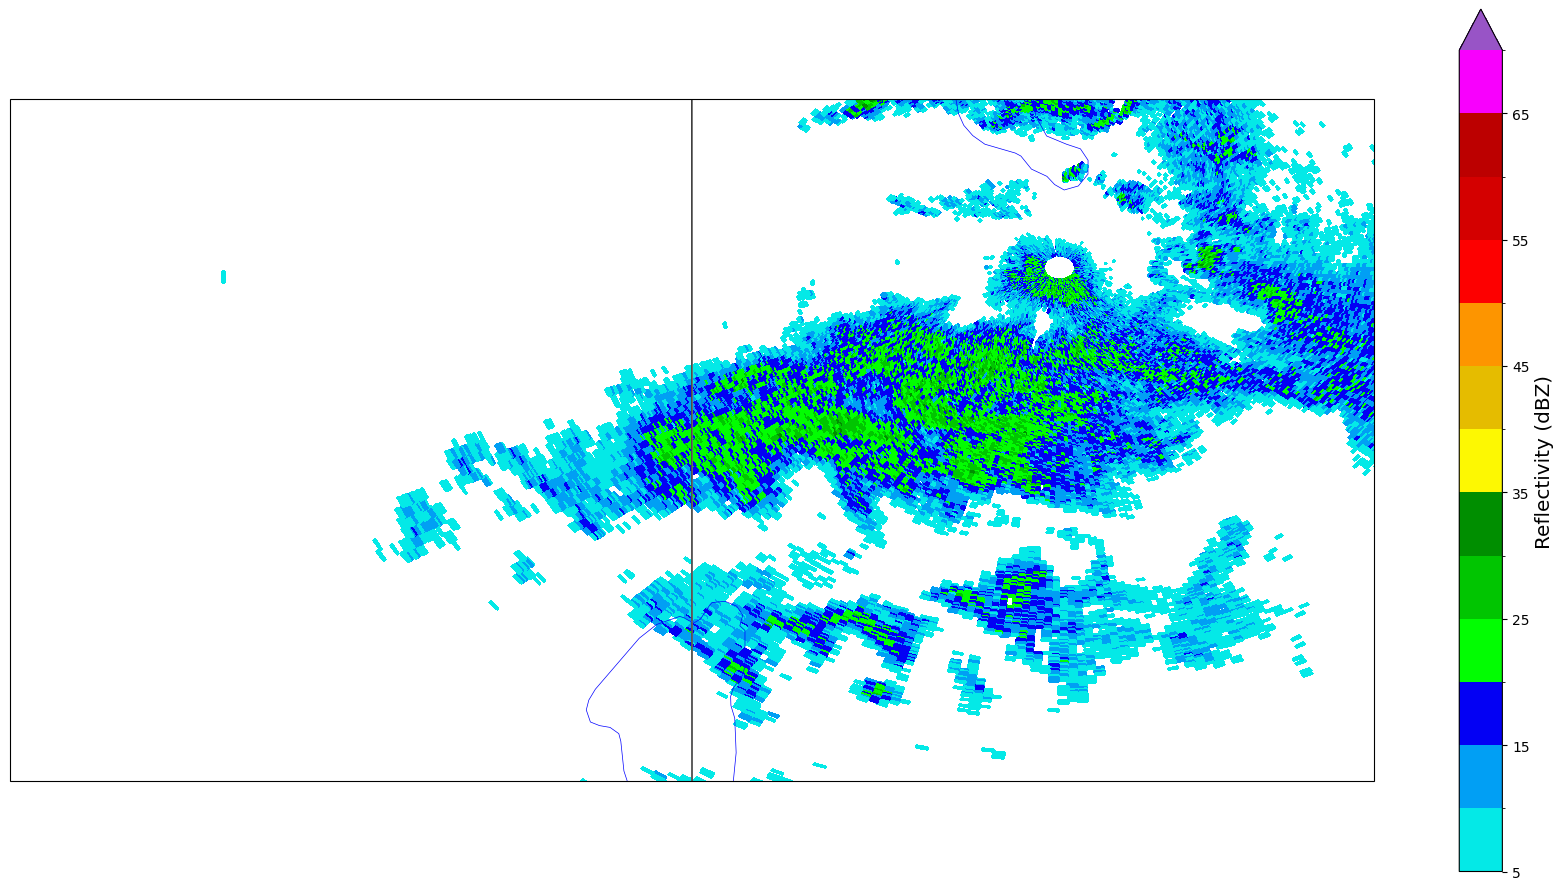

In [6]:
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=DBZ_NORM, cmap=DBZ_CMAP),
                  ax=ax,
                  orientation = "vertical", 
                  pad=.05,
                  shrink=0.7,
                  use_gridspec=False)
cb.set_label('Reflectivity (dBZ)', size='x-large')
fig

In [7]:
from datetime import datetime
scan_time = datetime.strptime(data.time['units'][14:], "%Y-%m-%dT%H:%M:%SZ")
scan_time

datetime.datetime(2024, 1, 7, 0, 3, 9)

In [8]:
data.metadata['instrument_name']

'KRGX'

In [9]:
scans = data.fixed_angle['data']
scans

ang = 0.5

scan_ang = scans[(np.abs(scans-ang)).argmin()]
scan_idx = (np.abs(scans-ang)).argmin()
scans

array([ 0.        ,  0.        ,  0.48339844,  0.48339844,  0.87890625,
        0.87890625,  1.3183594 ,  1.3183594 ,  1.8017578 ,  2.4169922 ,
        3.1201172 ,  3.9990234 ,  5.0976562 ,  6.4160156 ,  7.998047  ,
       10.019531  ], dtype=float32)

In [10]:
fields = [field for field in data.fields]
fields

['clutter_filter_power_removed',
 'cross_correlation_ratio',
 'reflectivity',
 'velocity',
 'differential_phase',
 'differential_reflectivity',
 'spectrum_width']